In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd

from pathlib import Path
from sklearn.model_selection import train_test_split

from datetime import datetime
import sys

In [4]:
nfs_path = "/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/"

#data_subdir = "Dstlnu_Hc_corr_BsigX_separation_dataRun1/"   
#root_subdir = "axheim_data2_MC14_100kEvts/"   

root_path = "/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/SHR_Hc_correctReco_BsX/SHR_dataSteering_run1/"

## load dataframe

In [5]:
df_FSPs = pd.read_csv(root_path + "final_df_FSPs_preProcessed_SHR_gamma100cut.csv")
df_Y4S = pd.read_csv(root_path + "final_df_Y4S_preProcessed_SHR.csv")

## analysis

In [6]:
groupsAllFSPs = pd.DataFrame({'count' : df_FSPs.groupby(["__event__"]).size()}).reset_index()

In [12]:
groupsAllFSPs

,__event__,count
0,557,14
1,903,17
2,2070,16
3,2646,17
4,3403,15
...,...,...
53468,50996982,17
53469,50997399,13
53470,50997576,10
53471,50997788,16


In [8]:
groupsAllFSPs["count"].describe()

count    53473.000000
mean        15.198193
std          3.695903
min          5.000000
25%         13.000000
50%         15.000000
75%         18.000000
max         44.000000
Name: count, dtype: float64

In [19]:
for i in range(10):
    sample = groupsAllFSPs.sample(n=128)
    print(sample["count"].max())

23
28
25
23
25
26
26
34
30
33


<AxesSubplot:>

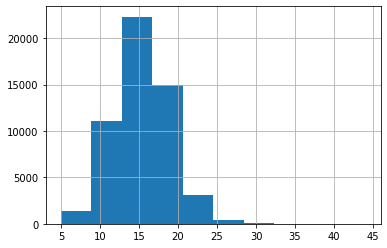

In [7]:
groupsAllFSPs["count"].hist()

In [16]:
cut_groupsAllFSPs = groupsAllFSPs[groupsAllFSPs["count"] < 30]

In [24]:
for percentile in [0.8,0.85,0.9,0.95,0.975,0.98,0.99,0.995,0.996,0.997,0.998,0.999]:
    valueCut = cut_groupsAllFSPs["count"].quantile(q=percentile)
    value = groupsAllFSPs["count"].quantile(q=percentile)
    
    print("percentile",percentile)
    
    print("for uncut data:",value)    
    print("for cut data:",valueCut)

percentile 0.8
for uncut data: 18.0
for cut data: 18.0
percentile 0.85
for uncut data: 19.0
for cut data: 19.0
percentile 0.9
for uncut data: 20.0
for cut data: 20.0
percentile 0.95
for uncut data: 21.0
for cut data: 21.0
percentile 0.975
for uncut data: 23.0
for cut data: 22.0
percentile 0.98
for uncut data: 23.0
for cut data: 23.0
percentile 0.99
for uncut data: 25.0
for cut data: 24.0
percentile 0.995
for uncut data: 27.0
for cut data: 26.0
percentile 0.996
for uncut data: 28.0
for cut data: 26.0
percentile 0.997
for uncut data: 29.0
for cut data: 27.0
percentile 0.998
for uncut data: 30.0
for cut data: 27.313999999998487
percentile 0.999
for uncut data: 32.0
for cut data: 28.0


<AxesSubplot:>

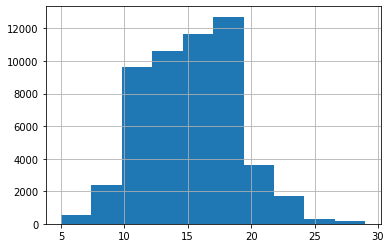

In [18]:
cut_groupsAllFSPs["count"].hist()

In [21]:
liste1=[]
liste2=[]
for i in range(100):
    sample = groupsAllFSPs.sample(n=128)
    sample2 = cut_groupsAllFSPs.sample(n=128)
    liste1.append(sample["count"].max())
    liste2.append(sample2["count"].max())
    
    #print(sample["count"].max(),sample2["count"].max())

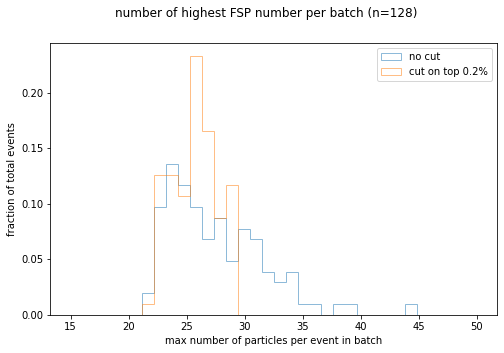

In [26]:
bins = np.linspace(15, 50, 35)
fig, ax = plt.subplots()
fig.suptitle(r'number of highest FSP number per batch (n=128)')
fig.set_size_inches(8, 5)

ax.set_xlabel(r'max number of particles per event in batch')
ax.set_ylabel("fraction of total events")

ax.hist(liste1,bins=bins,density=True, alpha=0.5, label=(r'no cut'),histtype='step')
ax.hist(liste2,bins=bins,density=True, alpha=0.5, label=(r'cut on top 0.2%'),histtype='step')



ax.legend(loc='upper right')

plt.savefig('maxNumFSPs_histo_SHR_run1data_perBatch.pdf')

In [ ]:
#df_FSPs = df_FSPs[df_FSPs['__event__'].isin(df_Y4S["__event__"])]